# Cardiovascular disease Classification Project

In this project, we have used [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) from kaggle. Based on some health conditions of an individual my model will predict whether he has any cardiovascular disease or not.

Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/zenjahid/Classification-using-ML/main/cardio_train.csv"

raw_data = pd.read_csv(url,sep=';')
# Check the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
raw_data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [ ]:
print(f"Missing values are present: {raw_data.isnull().sum().any()}")

Missing values are present: False


* There is no mising value in the data.
* I will drop column 'id' as it is irrelevant to target variable.
* Transform age column into years instead of days.
* Gender feature should not be categorized into 1 and 2 because 2 is always numerically bigger than 1, the model would take into account that and give a bigger ratio to one gender for having a disease. So, I will make that binary.
* I will check and drop duplicates.

In [ ]:
raw_data.drop('id',axis=1,inplace=True)
raw_data.age = np.round(raw_data.age/365.25,decimals=1)
raw_data.gender = raw_data.gender.replace(2,0)
raw_data.duplicated().sum()

674

In [ ]:
# dropping duplicated rows
raw_data.drop_duplicates(inplace=True)

# Exploratory Data Analysis and Data Preprocessing

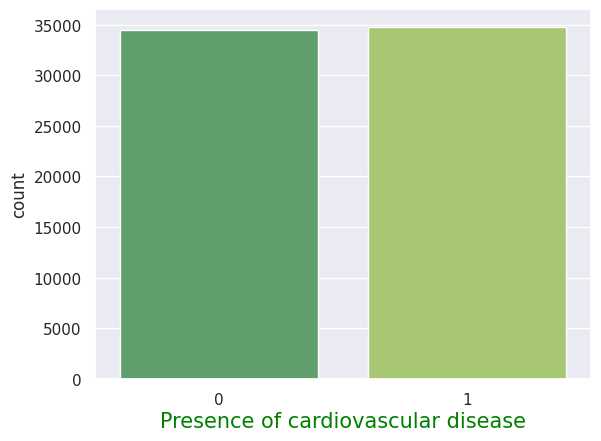

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data=raw_data, x='cardio', palette='summer')
plt.xlabel('Presence of cardiovascular disease', fontdict={'fontsize': 15, 'color': 'Green'}, labelpad=3)
plt.show()


So, data is almost balanced. Let's see which gender has more cases of disease. As in this data there was no knowledge of which gender is denoted by which number, I will use simple fact that women's average age is less than that of men.

In [ ]:
a = raw_data[raw_data["gender"]==0]["height"].mean()
b = raw_data[raw_data["gender"]==1]["height"].mean()
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
print("Gender:0 is "+ gender +" & Gender:1 is " + gender1)

Gender:0 is male & Gender:1 is female


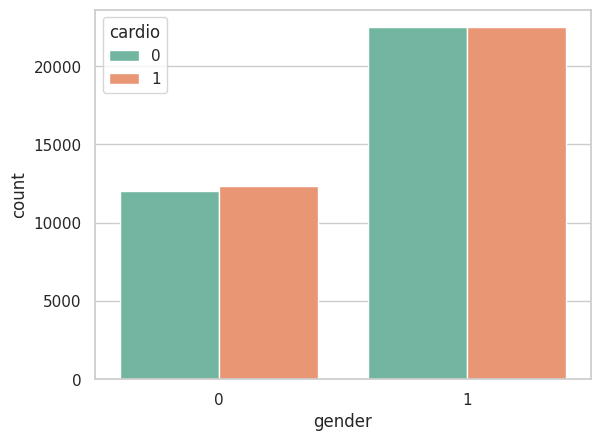

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=raw_data, x='gender', hue='cardio', palette="Set2")
plt.show()

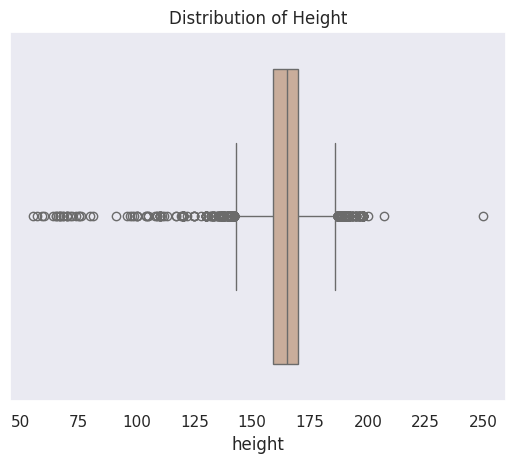

In [ ]:
sns.set_style('dark')
sns.boxplot(x=raw_data['height'], palette='pink')
plt.title('Distribution of Height')
plt.show()


Text(0.5, 1.0, 'Distribution of weight')

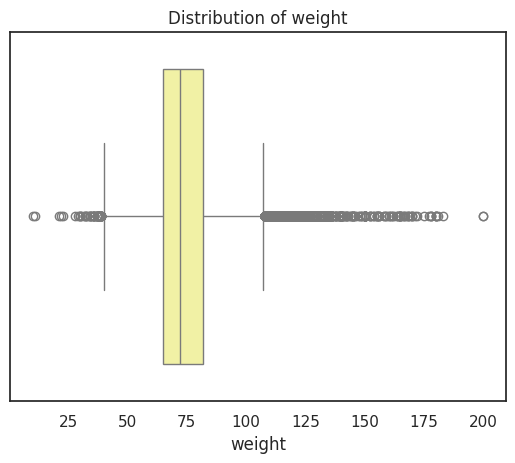

In [ ]:
sns.set_style('white')
sns.boxplot(x=raw_data['weight'],palette='terrain')
plt.title('Distribution of weight')

I will remove extremely rare cases of height and weight. As data is quite big, there will be no prblem while modelling.

In [ ]:
raw_data = raw_data[(raw_data['height']<250) & (raw_data['weight']>20.0)]

There are many outliers in height and weight features. I combine both of these into a new feature bmi.

In [ ]:
raw_data["bmi"] = (raw_data["weight"]/ (raw_data["height"]/100)**2).round(1)
raw_data[raw_data['bmi']<10]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
26806,63.7,1,157,23.0,110,80,1,1,0,0,1,0,9.3
29488,55.9,0,177,22.0,120,80,1,1,1,1,1,0,7.0
60188,59.8,1,162,21.0,120,80,2,1,0,0,1,1,8.0
60699,51.7,1,171,29.0,110,70,2,1,0,0,1,1,9.9


In [ ]:
raw_data[raw_data['bmi']>100].sort_values(by='weight',ascending=False).head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
27384,41.9,1,80,178.0,140,90,3,3,0,0,1,1,278.1
8171,48.3,0,97,170.0,160,100,1,1,1,0,1,1,180.7
12770,53.6,1,75,168.0,120,80,1,1,1,0,1,1,298.7
15366,47.7,1,125,167.0,180,90,1,2,0,0,1,1,106.9
20028,54.1,1,112,167.0,180,120,1,1,0,1,1,0,133.1


Further, We will remove extremely underweight and obese people because such cases seems impossible. For example, there are observations with 80 cm height and 165 kgs weight which is quite impossible. May be it was a fake observation or typing mistake. Also, health conditions of dwarf and abnormally tall people are totally different so We don't want to include them.

In [ ]:
data= raw_data[(raw_data['bmi']>10) & (raw_data['bmi']<100)].copy()

Text(0.5, 1.0, 'Distribution of BMI')

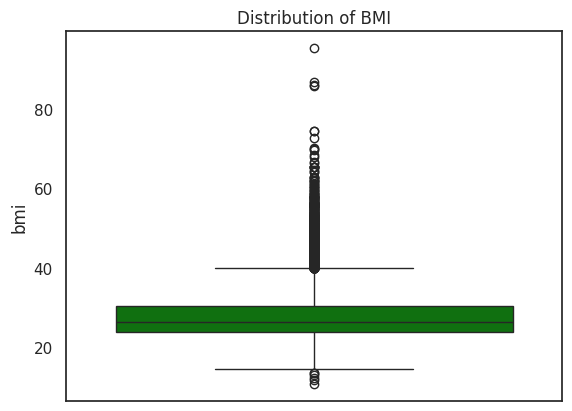

In [ ]:
sns.boxplot(data.bmi,color='Green')
plt.title('Distribution of BMI')

In [ ]:
data.drop(['weight','height'],axis=1,inplace=True)

Observations have been recorded mostly for people with age between 40 and 65


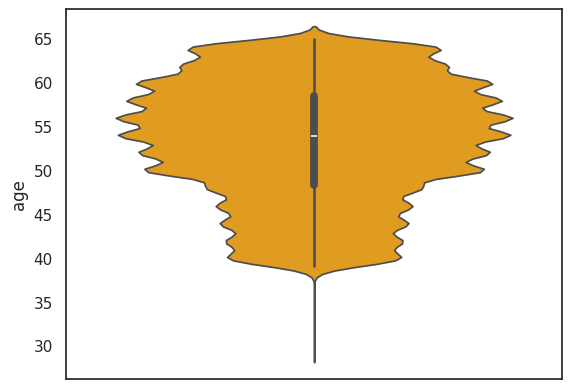

In [ ]:
sns.violinplot(data.age,color='orange')
print("Observations have been recorded mostly for people with age between 40 and 65")

Now, We will remove outliers and abrupt blood pressure values.

In [ ]:
(data['ap_lo']>360).sum()


952

In [ ]:
(data['ap_hi']>360).sum()

39

In [ ]:
data= data[(data['ap_lo']<360) & (data['ap_hi']<360)].copy()
data= data[(data['ap_lo']>20) & (data['ap_hi']>20)].copy()
data=data[data['ap_hi']>data['ap_lo']]

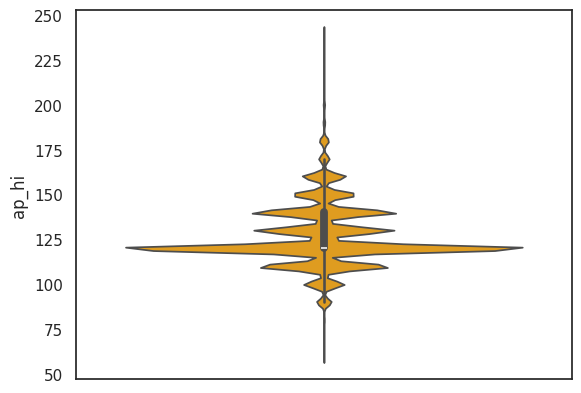

In [ ]:
sns.violinplot(data.ap_hi,color='orange');

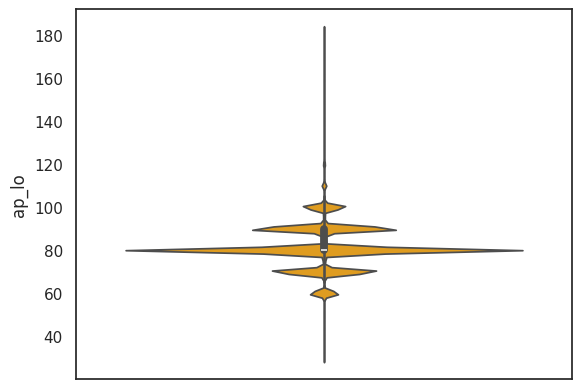

In [ ]:
sns.violinplot(data.ap_lo,color='orange');

In [ ]:
#creating dummy variables for categorical column
data['cholesterol']=data['cholesterol'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
data['gluc']=data['gluc'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
dummies = pd.get_dummies(data[['cholesterol','gluc']],drop_first=True)
final_data = pd.concat([data,dummies],axis=1)
final_data.drop(['cholesterol','gluc'],axis=1,inplace=True)
final_data.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal
0,50.4,0,110,80,0,0,1,0,22.0,True,False,True,False
1,55.4,1,140,90,0,0,1,1,34.9,False,True,True,False
2,51.6,1,130,70,0,0,0,1,23.5,False,True,True,False
3,48.2,0,150,100,0,0,1,1,28.7,True,False,True,False
4,47.8,1,100,60,0,0,0,0,23.0,True,False,True,False


In [ ]:
#plotting using plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

print('Correlation of features with target variable')
final_data.corr()['cardio'].sort_values()[:-1].iplot(kind='barh')

Correlation of features with target variable


### Splitting and Standardizing data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(final_data.drop('cardio',axis=1),final_data.cardio,test_size=0.30)

to_be_scaled_feat = ['age', 'ap_hi', 'ap_lo','bmi']
other_feat = ['gender', 'cholesterol_normal', 'cholesterol_well above normal',
       'gluc_normal', 'gluc_well above normal', 'smoke', 'alco', 'active']
scaler=StandardScaler()
scaler.fit(X_train[to_be_scaled_feat])
X_train[to_be_scaled_feat] = scaler.transform(X_train[to_be_scaled_feat])
X_test[to_be_scaled_feat] = scaler.transform(X_test[to_be_scaled_feat])

### Modelling

In [ ]:
# importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score,classification_report
# Defining classifiers
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(),
    'Artificial Neural Network (ANN)' : MLPClassifier(max_iter=1000)  # Added ANN
}

# Creating an empty DataFrame to store results
results = pd.DataFrame(columns=['Accuracy in %', 'F1-score'])

# Looping through classifiers to fit, predict, and calculate scores
for method, func in classifiers.items():
    func.fit(X_train, y_train)
    pred = func.predict(X_test)
    results.loc[method] = [
        100 * np.round(accuracy_score(y_test, pred), decimals=4),
        round(f1_score(y_test, pred), 2)
    ]

# Displaying results
results


,Accuracy in %,F1-score
Logistic Regression,72.92,0.71
Decision Tree,63.04,0.63
Random Forest,69.69,0.69
Support Vector Machines,73.51,0.72
K-nearest Neighbors,68.85,0.68
XGBoost,73.10,0.72
Artificial Neural Network (ANN),73.73,0.73


# Improving Accuracy by Hyperparameter Tuning

## K- Nearest Neighbors (by elbow method)

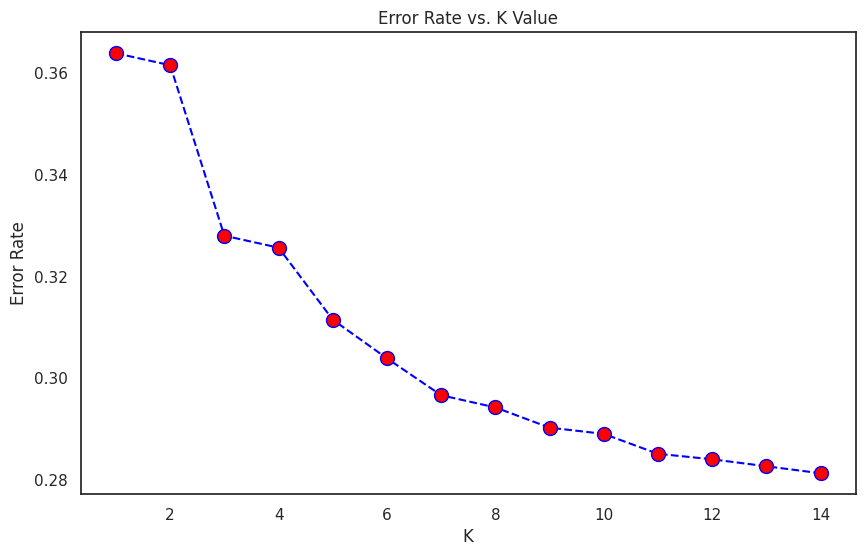

In [ ]:
error_rate = []

for i in range(1,15):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73     10138
           1       0.75      0.65      0.70     10254

    accuracy                           0.72     20392
   macro avg       0.72      0.72      0.71     20392
weighted avg       0.72      0.72      0.71     20392



In [ ]:
results.loc['K-nearest Neighbors(Improved)']= [100*np.round(accuracy_score(y_test,knn_pred),decimals=4),
                         round(f1_score(y_test,knn_pred),2)]

By using **elbow method** we have increased accuracy of this model from 69.4% to 72%.

## Random Forest (by GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]}
grid=GridSearchCV(RandomForestClassifier(),param_grid,verbose=1)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
grid_pred = grid.predict(X_test)
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10138
           1       0.76      0.69      0.72     10254

    accuracy                           0.73     20392
   macro avg       0.73      0.73      0.73     20392
weighted avg       0.73      0.73      0.73     20392



By using **GridSearchCV** we have increased accuracy of this model from 69% to 73%.

# Deep Neural Networks

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Ensure the data is in the correct format
X_train = X_train.to_numpy().astype(float)
X_val = X_val.to_numpy().astype(float)
y_train = y_train.to_numpy().astype(float)
y_val = y_val.to_numpy().astype(float)

# Building the model
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam')

# Defining early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Training the model
model.fit(x=X_train, y=y_train,
          validation_data=(X_val, y_val),
          batch_size=100, epochs=150, callbacks=[early_stop])


Epoch 1/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.6141 - val_loss: 0.5515
Epoch 2/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5562 - val_loss: 0.5477
Epoch 3/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5520 - val_loss: 0.5453
Epoch 4/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5539 - val_loss: 0.5442
Epoch 5/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5556 - val_loss: 0.5455
Epoch 6/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5538 - val_loss: 0.5424
Epoch 7/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5493 - val_loss: 0.5430
Epoch 8/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5447 - val_loss: 0.5450
Epoch 9/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5446 - val_loss: 0.5416
Epoch 10/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5459 - val_loss: 0.5421
Epoch 11/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5446 - val_loss: 0.5450
Epoch 12/150
381/381 ━━━━━━━━━━━━━━━━━━━━

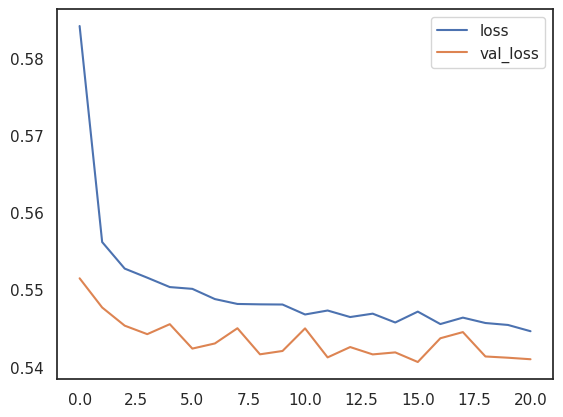

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [ ]:
from sklearn.metrics import classification_report

# Ensure X_test and y_test are numpy arrays of type float
X_test = X_test.to_numpy().astype(float)
y_test = y_test.to_numpy().astype(float)

# Getting predicted probabilities
dnn_pred_prob = model.predict(X_test)

# Converting probabilities to class labels
dnn_pred = (dnn_pred_prob > 0.5).astype("int32")

# Printing the classification report
print(classification_report(y_test, dnn_pred))


638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74     10138
         1.0       0.75      0.71      0.73     10254

    accuracy                           0.74     20392
   macro avg       0.74      0.74      0.74     20392
weighted avg       0.74      0.74      0.74     20392



# Results

In [ ]:
results.loc['Random Forest(Improved)']= [100*np.round(accuracy_score(y_test,grid_pred),decimals=4),
                         round(f1_score(y_test,grid_pred),2)]
results.loc['Deep Neural Network']= [100*np.round(accuracy_score(y_test,dnn_pred),decimals=4),
                         round(f1_score(y_test,dnn_pred),2)]
results.sort_values(by='Accuracy in %',ascending=False).style.highlight_max()

,Accuracy in %,F1-score
Artificial Neural Network (ANN),73.730000,0.730000
Deep Neural Network,73.700000,0.730000
Support Vector Machines,73.510000,0.720000
Random Forest(Improved),73.150000,0.720000
XGBoost,73.100000,0.720000
Logistic Regression,72.920000,0.710000
K-nearest Neighbors(Improved),71.590000,0.700000
Random Forest,69.690000,0.690000
K-nearest Neighbors,68.850000,0.680000
Decision Tree,63.040000,0.630000
